<a href="https://colab.research.google.com/github/niz11/Bachelor_Thesis_Colab_Files/blob/main/facenet_classifier_all_three_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load encoding
# 3_frame_seq
X = np.load('drive/My Drive/dataset_3_frame_seq_faces/X_3.npy')
y = np.load('drive/My Drive/dataset_3_frame_seq_faces/Y_label_3.npy')
frames = 3

# 5_frame_seq
# X = np.load('drive/My Drive/dataset_5_frame_seq_faces/X_5.npy')
# y = np.load('drive/My Drive/dataset_5_frame_seq_faces/Y_label_5.npy')
# frames = 5

# 10_frame_seq
# X = np.load('drive/My Drive/facea_seqs_one_frame_to_the_right/X.npy')
# y = np.load('drive/My Drive/facea_seqs_one_frame_to_the_right/Y_label.npy')
# frames = 10

test_size = 0.3
if frames ==5:
  test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)

# y_train = to_categorical(y_train, num_classes=7)
# y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(2681, 3, 128)
(2681,)
(1150, 3, 128)


In [ ]:
X_train_new = np.zeros(shape=(X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
X_test_new = np.zeros(shape=(X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

y_train_new = np.zeros(shape=(y_train.shape[0] * X_train.shape[1]))
y_test_new = np.zeros(shape=(y_test.shape[0] * X_train.shape[1]))

train_index = 0
for seq in range(X_train.shape[0]):
  for frame in range(X_train.shape[1]):
    X_train_new[train_index] = X_train[seq,frame]
    y_train_new[train_index] = y_train[seq]
    train_index  += 1
print(train_index)

test_index = 0
for seq in range(X_test.shape[0]):
  for frame in range(X_test.shape[1]):
    X_test_new[test_index] = X_test[seq,frame]
    y_test_new[test_index] = y_test[seq]
    test_index += 1
print(test_index)

y_train_new = to_categorical(y_train_new, num_classes=7)
y_test_new = to_categorical(y_test_new, num_classes=7)

8043
3450


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


def classifier():
  model = Sequential()
  model.add(Dense(64, input_dim=128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(7, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
model = classifier()
epochs = 50
if frames == 10:
  epochs = 100
model.fit(X_train_new, y_train_new, epochs=epochs, verbose=1, validation_split=0.1)

Epoch 1/50
227/227 [==============================] - 1s 3ms/step - loss: 1.4087 - accuracy: 0.4830 - val_loss: 1.0794 - val_accuracy: 0.6447
Epoch 2/50
227/227 [==============================] - 1s 3ms/step - loss: 0.8318 - accuracy: 0.7387 - val_loss: 0.8186 - val_accuracy: 0.7354
Epoch 3/50
227/227 [==============================] - 1s 3ms/step - loss: 0.5517 - accuracy: 0.8437 - val_loss: 0.6720 - val_accuracy: 0.8137
Epoch 4/50
227/227 [==============================] - 1s 3ms/step - loss: 0.3862 - accuracy: 0.8932 - val_loss: 0.5879 - val_accuracy: 0.8298
Epoch 5/50
227/227 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9268 - val_loss: 0.5554 - val_accuracy: 0.8422
Epoch 6/50
227/227 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.9461 - val_loss: 0.5586 - val_accuracy: 0.8410
Epoch 7/50
227/227 [==============================] - 1s 3ms/step - loss: 0.1656 - accuracy: 0.9612 - val_loss: 0.6058 - val_accuracy: 0.8273
Epoch 

In [ ]:
def getFaceExpressionFromIndex(i):
  if (i == 0):
      return 'surprise'
  elif (i == 1):
      return 'smile'
  elif (i == 2):
      return 'sad'
  elif (i == 3):
      return 'anger'
  elif (i == 4):
      return 'fear'
  elif (i == 5):
      return 'disgust'
  elif (i == 6):
      return 'none'
  else:
      print(i)

In [ ]:
test_predictions = model.predict(X_test_new)

correct = 0
for i in range(len(test_predictions)):
  if i % X_test.shape[1] ==0:
    truth = np.argmax(y_test_new[i])
    predictions = []
    for j in range(X_test.shape[1]):
      predictions.append(np.argmax(test_predictions[i + j]))
    if truth == max(predictions):
      correct += 1
    else:
      print(f'Wrong classification, truth: {getFaceExpressionFromIndex(truth)}')
      print(f'Wrong classification, prediction: {getFaceExpressionFromIndex(max(predictions))}')
      print("---------------------------------------------------------------------------")

print(f'Accuracy of predicitons: {correct / (len(test_predictions) / X_test.shape[1])}')
print(f'Got correct: {correct}')
print(f'Got wrong: {int(len(test_predictions) / X_test.shape[1]) - correct}')

Wrong classification, truth: none
Wrong classification, prediction: fear
---------------------------------------------------------------------------
Wrong classification, truth: none
Wrong classification, prediction: anger
---------------------------------------------------------------------------
Wrong classification, truth: smile
Wrong classification, prediction: fear
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: fear
---------------------------------------------------------------------------
Wrong classification, truth: fear
Wrong classification, prediction: none
---------------------------------------------------------------------------
Wrong classification, truth: fear
Wrong classification, prediction: disgust
---------------------------------------------------------------------------
Wrong classification, truth: sad
Wrong classification, prediction: anger
-----------------------------

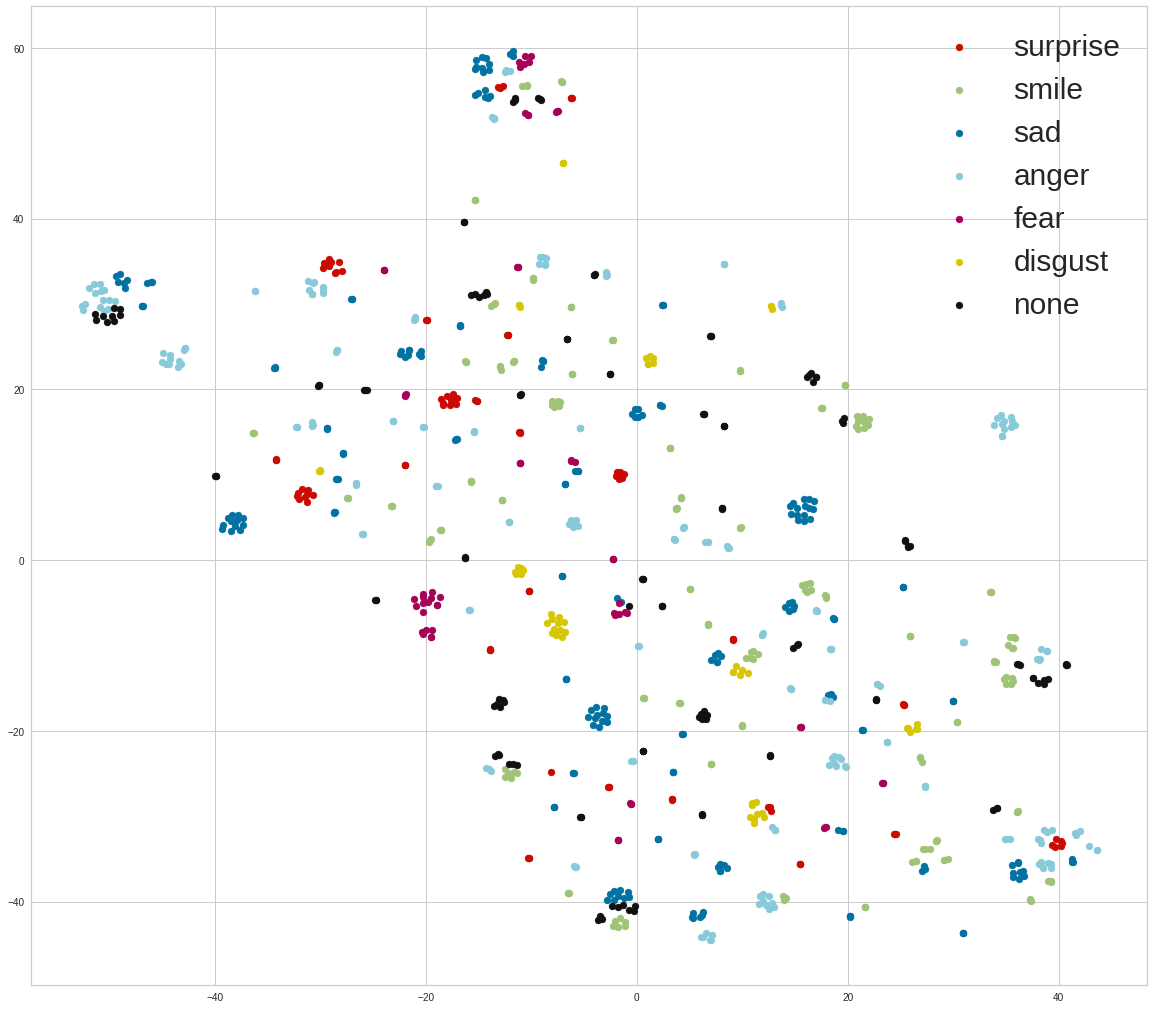

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X_test_new[:1000])

target_ids = range(0,7)

plt.figure(figsize=(20, 18))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
for i, c, label in zip(target_ids, colors, ["surprise", "smile","sad", "anger","fear", "disgust","none"]):
    plt.scatter(X_2d[y_new[:1000] == i, 0], X_2d[y_new[:1000] == i, 1], c=c, label=label)
plt.legend(prop={'size': 30})
plt.show()